# Hints for Homework 7

## Problem 1

In [16]:
function polygon_area(P)
    # Input P is an N+1 by 2 matrix that stores vertices
    # Used surveyor's area formula
    area = 0
    M = size(P,1)
    for i = 1:M-1
        area = area + .5*det([P[i,:]; P[i+1,:]])
    end
    return area
end

polygon_area (generic function with 1 method)

In [13]:
using PyPlot

function draw_edge(x, y)
    # draw the edge connecting points x and y
    N = 100
    t = linspace(0, 1, N)
    plot(t*x[1]+(1-t)*y[1], t*x[2]+(1-t)*y[2], linestyle = "-")
end


function draw_polygon(A)
    # draw polygons based on points passed by a n+1 by 2 matrix A
    # first check that A cannot be degenerate
    m = size(A, 1)
    for i = 1:m-1
        plot(A[i, 1], A[i, 2], marker = "o")    # plot the vertex
        # plot the edge
        draw_edge(A[i, :], A[i+1, :])
        plot(A[i+1, 1], A[i+1, 2], marker = "o")
    end
    draw_edge(A[m, :], A[1, :])
end

draw_polygon (generic function with 1 method)

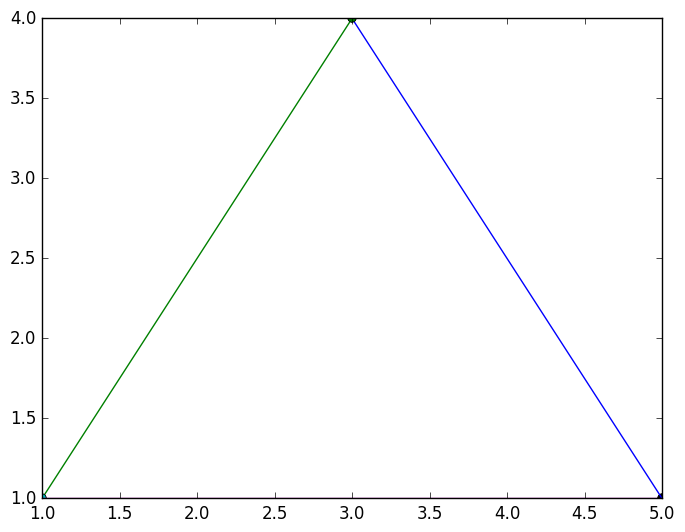

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001FA4A278>

In [14]:
P1 = [3 4; 1 1; 5 1; 3 4]
draw_polygon(P1)

In [17]:
polygon_area(P1)

12.0

In [31]:
R = 2
al = 0: (2*pi/6): 2*pi
xh = 1 + R*cos(al)
yh = 2 + R*sin(al)
P3=[xh'; yh']'

7x2 Array{Float64,2}:
  3.0          2.0     
  2.0          3.73205 
  4.44089e-16  3.73205 
 -1.0          2.0     
 -8.88178e-16  0.267949
  2.0          0.267949
  3.0          2.0     

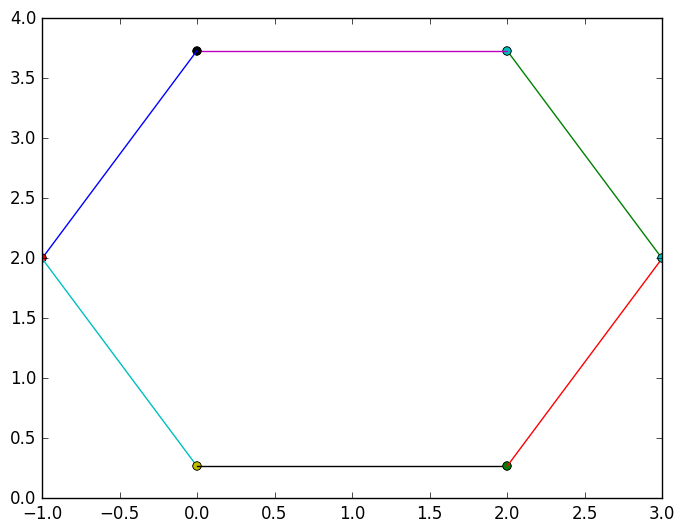

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000020223470>

In [32]:
draw_polygon(P3)

In [33]:
polygon_area(P3)

20.784609690826528

## Problem 2

Here is the algorithm:

1. First create two structures to store edges of two polygons; set $a = 0$;

2. Loop through two edge structures so check if there is an intersection. If so, set $a = 1$ and jump out of the loop; otherwise continue the loop;

3. Check if either vertex lies inside of the other. If so, set $a = 2$. Otherwise $a = 0$.

In [137]:
function poly_intersect(P1, P2)
    # Test whether P1 and P2 intersects
    # Input: polygon P1 and P2
    # Output: parameter a. 
    # a = 0, no intersect
    # a = 1, intersect
    # a = 2, one is contained in the other.
    a = 0
    M1 = size(P1, 1)
    M2 = size(P2, 1)
    edge1 = zeros(2,2)
    edge2 = zeros(2,2)
    for i = 1:M1-1
        for j = 1:M2-1
            edge1 = [P1[i,:]; P1[i+1,:]]
            edge2 = [P2[j,:]; P2[j+1,:]]
            if edge_intersect(edge1, edge2)
                a = 1
                break
            end
        end
    end
    if a == 0
        for i = 1:M1
            if inside_polygon(P1[i,:], P2)
                a = 2
                break
            end
        end
        for j = 1:M2
            if inside_polygon(P2[j,:], P1)
                a = 2
                break
            end
        end
    end
    return a
end

function inside_polygon(a, P)
    # Input: point a and polygon matrix P
    # Output: 1 if inside and 0 otherwise
    # Method: shooting rays
    hit = 0;
    M = size(P, 1)
    for i = 1:M-1
        # Now build up the matrix equation for checking intersection
        # Rays shoot in (1,1) direction
        A = [1 P[i+1,1]-P[i,1]; 1 P[i+1,2]-P[i,2]]
        b = [P[i+1,1]-a[1]; P[i+1,2]-a[2]]
        q = A\b
        if q[1]>0 && q[2]>0 && q[2]<=1
            hit = hit+1
        end
    end
    if mod(hit, 2) == 0
        return false
    else
        return true
    end
end

function edge_intersect(u, v)
    # Input: edge u and v, both 2 by 2
    # Output: 1 for intersect and 0 for no intersection
    A = [u[1,1]-u[2,1] -v[1,1]+v[2,1];
        u[1,2]-u[2,2] -v[1,2]+v[2,2]]
    b = [v[2,1]-u[2,1];
        v[2,2]-u[2,2]]
    x = A\b
    result = true
    result = result && x[1]>0 && x[1]<1
    result = result && x[2]>0 && x[2]<1
    return result
end

edge_intersect (generic function with 1 method)

In [120]:
u = [0 0;
1 1]
v = [0 1;
1 0]
edge_intersect(u,v)

true

In [121]:
function rand_poly(r, N)
    # Generate random polygons. 
    # Input: r is 1 by 2 position vector
    #        N is number of sides
    # Output: an N by 2 matrix representing the polygon
    theta = linspace(0, 2*pi*(1-1/N), N) + randn()/3
    rho = 2 + 2*rand(size(theta))
    x = rho.*cos(theta)
    y = rho.*sin(theta)
    z = repmat(r, N)
    p = [x y] + z
    p = [p; p[1,:]]
end

rand_poly (generic function with 1 method)

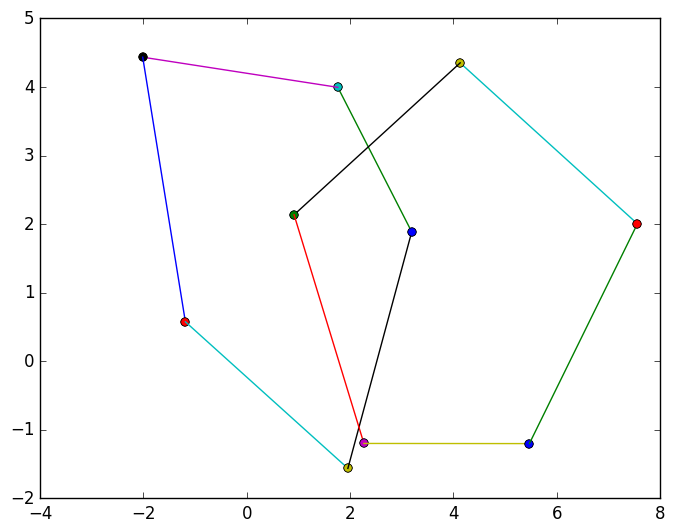

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000025D59EF0>

In [143]:
r1 = [1 2]
r2 = [4 1]
N = 5 
P1 = rand_poly(r1,N)
P2 = rand_poly(r2,N)
draw_polygon(P1)
draw_polygon(P2)

In [144]:
poly_intersect(P1, P2)

1

# Problem 3

This problem is essentially a convex hull generating problem. It is very straight-forward so I won't write down the code here. I may come back to finish this part with some Julia computational geometry package once I have time to do so.